# Ada Boost

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#finding the coreln bw the features
corr=data.corr()
corr.shape

(14, 14)

In [8]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


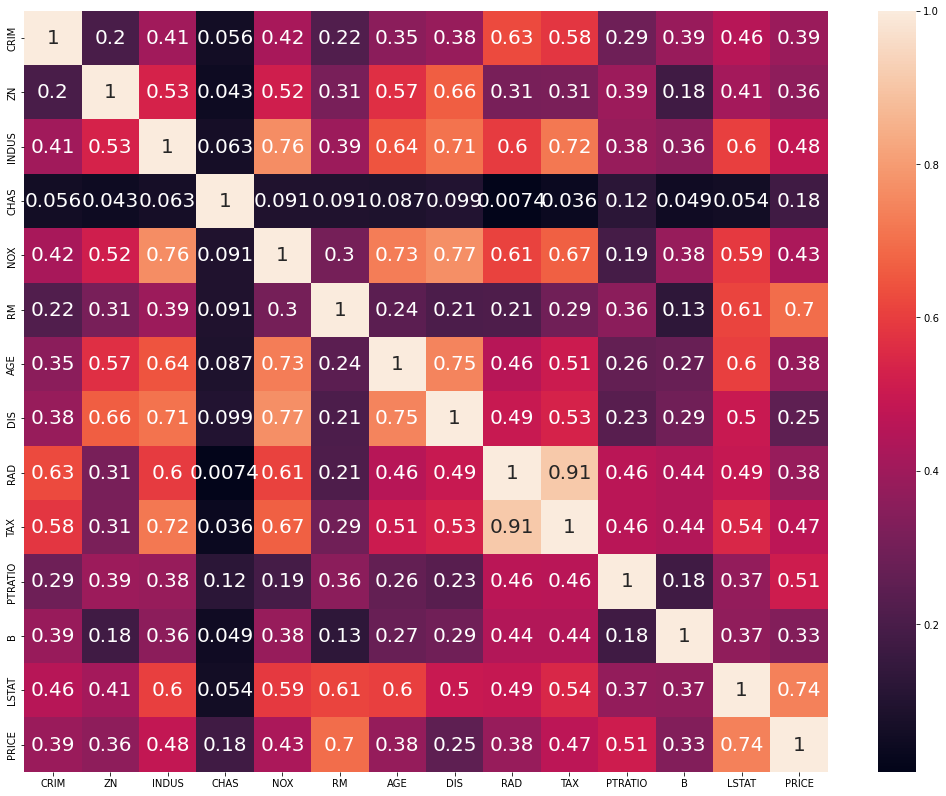

In [9]:
df_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20})
plt.show()

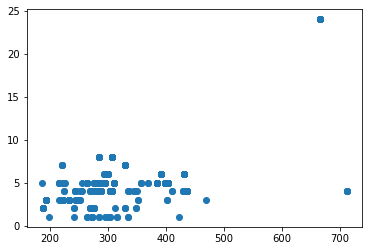

In [11]:
plt.scatter(data.TAX,data.RAD)
plt.show()

In [12]:
#dividing feature and labels 
X=data.drop(columns=['PRICE'],axis=1)
y=data['PRICE']

In [13]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=.25,random_state=41)

# Adaboost

In [14]:
from sklearn.ensemble import AdaBoostRegressor

In [15]:
ada=AdaBoostRegressor()

In [16]:
ada.fit(X_train,Y_train)

AdaBoostRegressor()

In [17]:
y_pred=ada.predict(X_train)

In [18]:
accuracy=metrics.r2_score(Y_train,y_pred)
accuracy

0.9172183073638009

In [19]:
y_test_pred=ada.predict(x_test)

In [20]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.6583987961784941

# Hypertunning using RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [23]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [24]:
rnd_srch.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [25]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=47)

In [26]:
ada=AdaBoostRegressor(learning_rate=0.25,n_estimators=70)
ada.fit(X_train,Y_train)       

AdaBoostRegressor(learning_rate=0.25, n_estimators=70)

In [27]:
y_test_pred=ada.predict(x_test)    

print(metrics.r2_score(y_test,y_test_pred))

0.6621501675204111


# 5June

# Gradient Boosted Trees

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
#just find the corelation of features vs target using corrwith
df.drop('target',axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

# Visualize the correlation 

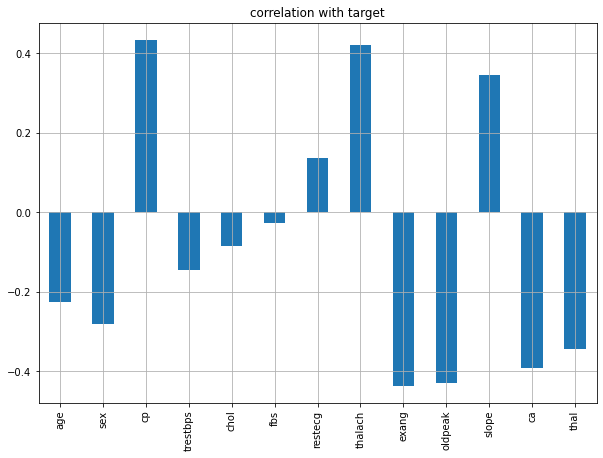

In [34]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')
plt.show()

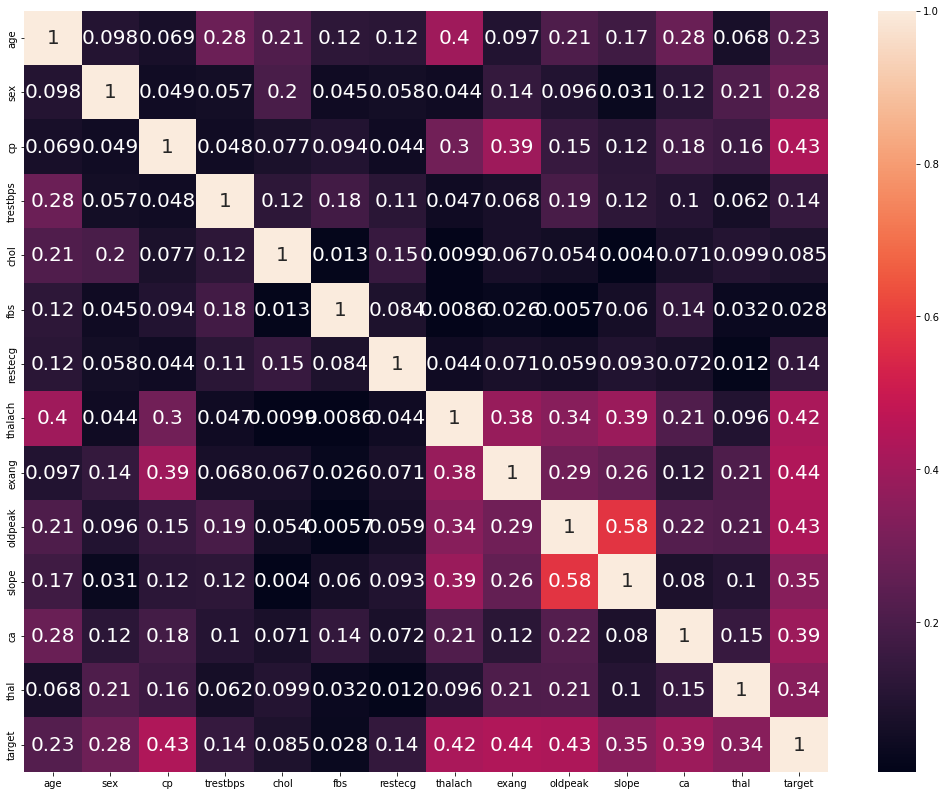

In [36]:
df_corr=df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20})
plt.show()

# Model building using selectpercentile features

In [37]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 #more like annova test

In [38]:
X=df.drop(['target'],axis=1)
y=df.target

Spercentile=SelectPercentile(score_func=chi2,percentile=80) #score_func=
Spercentile=Spercentile.fit(X,y)

In [39]:
#sep the features to check th p-values
cols=Spercentile.get_support(indices=True)#to return index numbers insted of boolean
print('features Index = ',cols)

features=X.columns[cols]
print('Features = ',list(features))

features Index =  [ 0  1  2  3  4  7  8  9 10 11]
Features =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [40]:
df_scores=pd.DataFrame({'features':X.columns,'Chiscore':Spercentile.scores_,'pvalues':Spercentile.pvalues_})
df_scores.sort_values(by='Chiscore',ascending=False)

,features,Chiscore,pvalues
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [41]:
#create subset of selected features 
X=df[features]
y=df.target

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
scaler =StandardScaler()
x_scaler = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=42)

# GrandientBoostingClassifier 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
gbdt_clf=GradientBoostingClassifier()
gbdt_clf.fit(X_train,y_train)
pred=gbdt_clf.predict(X_train)

gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{gbdt_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=gbdt_clf.predict(X_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")


==================Train Result=============
Accuracy Score:100.00%
-----------------------------------------
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
----------------------------------
confusion matrix:
[[ 97   0]
 [  0 115]]

***********test results***********
Accuracy Score:83.52%
-----------------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000000
----------------------------------
confusio

# Hypertunning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid_param={'max_depth':range(4,8),
           'min_samples_split':range(2,8,2)}#'learing_rate':np.arange(0.1,0.3)

In [48]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)


In [49]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [50]:
grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [51]:
gbdt_clf=GradientBoostingClassifier(max_depth= 4, min_samples_split= 2)
gbdt_clf.fit(X_train,y_train)
pred=gbdt_clf.predict(X_train)

gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{gbdt_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=gbdt_clf.predict(X_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")


==================Train Result=============
Accuracy Score:100.00%
-----------------------------------------
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
----------------------------------
confusion matrix:
[[ 97   0]
 [  0 115]]

***********test results***********
Accuracy Score:83.52%
-----------------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.795455   0.872340  0.835165   0.833897      0.837700
recall      0.853659   0.820000  0.835165   0.836829      0.835165
f1-score    0.823529   0.845361  0.835165   0.834445      0.835525
support    41.000000  50.000000  0.835165  91.000000     91.000000
----------------------------------
confusio

In [52]:
gbdt_clf=GradientBoostingClassifier(learning_rate=0.49,max_depth= 4, min_samples_split= 2)
gbdt_clf.fit(X_train,y_train)
pred=gbdt_clf.predict(X_train)

gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{gbdt_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=gbdt_clf.predict(X_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")


==================Train Result=============
Accuracy Score:100.00%
-----------------------------------------
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
----------------------------------
confusion matrix:
[[ 97   0]
 [  0 115]]

***********test results***********
Accuracy Score:79.12%
-----------------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.829787  0.791209   0.789894      0.793839
recall      0.804878   0.780000  0.791209   0.792439      0.791209
f1-score    0.776471   0.804124  0.791209   0.790297      0.791665
support    41.000000  50.000000  0.791209  91.000000     91.000000
----------------------------------
confusio

# XGBOOST

In [55]:
import pandas as pd
 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
import xgboost  as xgb

import warnings
warnings.filterwarnings('ignore')

In [56]:
import xgboost as xgb

In [73]:
df=pd.read_csv(r'C:\Users\yoges\OneDrive\Desktop\vehicles_data_students.csv')

In [74]:
df.head(5)

,Unnamed: 0,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,55483,7315914053,0,2018.0,ram,promaster 2500,excellent,NaN,gas,44244.0,clean,automatic,NaN,NaN,van,NaN,NaN,ca,32.792800,-116.966500
1,162368,7310885048,13995,2017.0,mazda,cx-3,NaN,4 cylinders,gas,7037.0,rebuilt,automatic,NaN,NaN,SUV,white,NaN,ia,41.207382,-96.023096
2,234393,7308243856,19990,2019.0,mitsubishi,eclipse cross sp,good,NaN,gas,35313.0,clean,other,4wd,NaN,hatchback,white,NaN,nc,35.190000,-80.830000
3,276110,7315817729,0,2019.0,honda,cr-v,NaN,NaN,gas,25626.0,clean,automatic,NaN,NaN,SUV,orange,NaN,ny,40.854573,-74.120219
4,349033,7301620999,42900,2015.0,chevrolet,corvette,excellent,8 cylinders,gas,29000.0,clean,automatic,NaN,NaN,convertible,black,NaN,sc,34.755562,-82.906419


In [75]:
df.shape

(64032, 20)

In [76]:
df.columns

Index(['Unnamed: 0', 'id', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'county',
       'state', 'lat', 'long'],
      dtype='object')

In [77]:
drop_columns=['Unnamed: 0', 'id','title_status','size','lat','county','long']
df.drop(columns=drop_columns,axis=1,inplace=True)

In [78]:
df.shape

(64032, 13)

In [79]:
df.isna().sum()

price               0
year              158
manufacturer     2569
model             802
condition       26097
cylinders       26511
fuel              424
odometer          669
transmission      353
drive           19471
type            13785
paint_color     19505
state               0
dtype: int64

In [80]:
df=df.dropna()
df.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,automatic,rwd,sedan,white,fl
9,20995,2011.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,92001.0,automatic,4wd,truck,blue,wi
15,50995,2017.0,gmc,yukon denali,like new,8 cylinders,gas,70227.0,automatic,4wd,SUV,grey,ak
22,13500,2014.0,chevrolet,tahoe,good,8 cylinders,gas,96007.0,automatic,rwd,SUV,white,fl
29,34990,2016.0,gmc,canyon crew cab sle pickup,good,6 cylinders,gas,34425.0,other,4wd,pickup,red,ma


In [81]:
df.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [83]:
df.describe()

,price,year,odometer
count,1.749100e+04,17491.000000,1.749100e+04
mean,1.632545e+04,2009.535247,1.122616e+05
std,1.294429e+05,9.596493,2.155149e+05
min,0.000000e+00,1918.000000,0.000000e+00
25%,5.600000e+03,2006.000000,5.578700e+04
50%,1.095000e+04,2012.000000,1.025670e+05
75%,2.250000e+04,2015.000000,1.480000e+05
max,1.700000e+07,2022.000000,1.000000e+07


In [84]:
df.drop_duplicates(inplace=True)

In [85]:
df.shape

(16399, 13)

# Filter Categorical features

In [86]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorial_columns=[]
features=df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics:
        continue
    categorial_columns.append(col)

In [87]:
categorial_columns

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

In [88]:
df_dummies=pd.get_dummies(df[categorial_columns],drop_first=True)

In [89]:
df_dummies.head()

,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df_dummies.shape

(16399, 4317)

In [91]:
df=df.join(df_dummies)

In [92]:
df.shape

(16399, 4330)

In [93]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,automatic,rwd,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,92001.0,automatic,4wd,...,0,0,0,0,0,0,0,1,0,0
15,50995,2017.0,gmc,yukon denali,like new,8 cylinders,gas,70227.0,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
22,13500,2014.0,chevrolet,tahoe,good,8 cylinders,gas,96007.0,automatic,rwd,...,0,0,0,0,0,0,0,0,0,0
29,34990,2016.0,gmc,canyon crew cab sle pickup,good,6 cylinders,gas,34425.0,other,4wd,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df.drop(columns=categorial_columns,axis=1,inplace=True)

In [95]:
df.head(2)

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,149000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,92001.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
df.columns

Index(['price', 'year', 'odometer', 'manufacturer_alfa-romeo',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler',
       ...
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy'],
      dtype='object', length=4320)

In [99]:
df.isna().sum()

price                      0
year                       0
odometer                   0
manufacturer_alfa-romeo    0
manufacturer_audi          0
                          ..
state_vt                   0
state_wa                   0
state_wi                   0
state_wv                   0
state_wy                   0
Length: 4320, dtype: int64

In [100]:
df=df[df['price']>1000]
df=df[df['price']<40000]

In [101]:
df.shape

(14742, 4320)

In [103]:
y=df['price']
X=df.drop(['price'],axis=1)

In [104]:
train_X,test_x,train_Y,test_y=train_test_split(X,y,test_size=0.25,random_state=10)

# XGB

In [105]:
xgb=xgb.XGBRegressor()

In [106]:
xgb.fit(train_X,train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [107]:
y_pred=xgb.predict(test_x)

In [108]:
r2_score(test_y,y_pred)

0.8494808147571992